**Fin 400**  
**Diether**  
**Annualizing Returns**<br>

**Overview**

+ We mostly work with monthly (or daily) data.

+ But sometimes we want quarterly or annual returns.

+ For example, plots of annual returns can be quite informative for examining portfolio performance.

+ Let's annualize some portfolios returns:

  - buyback: a portfolio that holds stocks that made large stock repurchases during the previous three years.

  -seo: a portfolio that holds stocks that performed the biggest SEOs in the previous three years.

+ Concepts and tools used: logical indexing, cumprod function, using date indexes, lagging with shift, and bar plots.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

port = pd.read_csv('http://diether.org/quant/23-port_issue.csv',parse_dates=['caldt'])
port

,caldt,buyback,seo
0,1990-01-31,-0.063468,-0.107680
1,1990-02-28,0.016431,0.016300
2,1990-03-30,0.017486,0.045293
3,1990-04-30,-0.024719,-0.043303
4,1990-05-31,0.057357,0.087608
...,...,...,...
423,2025-04-30,-0.043254,-0.067773
424,2025-05-30,0.053841,0.102940
425,2025-06-30,0.039953,0.032459
426,2025-07-31,0.011794,-0.001937


In [2]:
port[['buyback','seo']].describe().round(4)

,buyback,seo
count,428.0000,428.0000
mean,0.0120,0.0008
std,0.0465,0.0710
min,-0.2706,-0.2525
25%,-0.0123,-0.0405
50%,0.0181,0.0095
75%,0.0401,0.0439
max,0.1674,0.2485


**2. Cumprod Function (Used a Few Times Now)**

+ `dataframe.cumprod()`: returns cumulative product overeach column in a dataframe.

+ If a column equals (1 + return), cumprod works like an expanding compounding function:

\begin{align*}
R_{1} &= (1+r_1) \\[1.05ex]
R_{1,2} &= (1+r_1)(1+r_2) \\[1.05ex]
R_{1,3} &= (1+r_1)(1+r_2)(1+r_3) \\[1.05ex]
\end{align*}

In [3]:
port = port.set_index('caldt')
port.head(12)

,buyback,seo
caldt,,
1990-01-31,-0.063468,-0.107680
1990-02-28,0.016431,0.016300
1990-03-30,0.017486,0.045293
1990-04-30,-0.024719,-0.043303
1990-05-31,0.057357,0.087608
1990-06-29,-0.000614,-0.002904
1990-07-31,-0.023939,-0.040442
1990-08-31,-0.113530,-0.126320
1990-09-28,-0.075192,-0.105380


In [5]:
compound = (1 + port).cumprod()
compound

,buyback,seo
caldt,,
1990-01-31,0.936532,0.892320
1990-02-28,0.951920,0.906865
1990-03-30,0.968565,0.947939
1990-04-30,0.944623,0.906891
1990-05-31,0.998804,0.986342
...,...,...
2025-04-30,86.666699,0.429979
2025-05-30,91.332920,0.474241
2025-06-30,94.981944,0.489635


**3. Calculating Annual Returns**

+ We can create annual returns by noting the we have the value of the portfolio based on investing one dollar in the portfolio at the start.

+ The annual return on a portfolio for 2016 is the following:
$$
r_{2016} = \frac{V_{Dec,2016}}{V_{Dec,215}} - 1
$$

Steps to compute annual returns:

1. Create a dataframe with only December in it. Note, if the index is a date, it has a date accessor built in. Can get the month with: df.index.month.

2. Compute the annual returns: $p0/p0.shift(1) - 1$

In [6]:
ann = compound[compound.index.month == 12]
ann

,buyback,seo
caldt,,
1990-12-31,0.836775,0.775103
1991-12-31,1.208694,1.258854
1992-12-31,1.589074,1.281891
1993-12-31,1.905531,1.447107
1994-12-30,1.974476,1.215013
1995-12-29,2.672000,1.579981
1996-12-31,3.353418,1.680809
1997-12-31,4.830089,1.998454
1998-12-31,4.918168,1.773215


In [8]:
ann = ann / ann.shift(1) - 1
ann

,buyback,seo
caldt,,
1990-12-31,NaN,NaN
1991-12-31,0.444467,0.624111
1992-12-31,0.314703,0.018300
1993-12-31,0.199146,0.128884
1994-12-30,0.036181,-0.160384
1995-12-29,0.353271,0.300382
1996-12-31,0.255022,0.063816
1997-12-31,0.440348,0.188983
1998-12-31,0.018236,-0.112707


In [9]:
ann.describe().round(3)

,buyback,seo
count,34.000,34.000
mean,0.166,0.028
std,0.189,0.262
min,-0.373,-0.500
25%,0.045,-0.181
50%,0.179,0.043
75%,0.301,0.187
max,0.481,0.624


**4. Bar Plots of the Annual Returns**

+ `Pandas` has a bar plot function.

+ If you don't specify the x-variable. Pandas assumes it's the index.

<Axes: xlabel='year'>

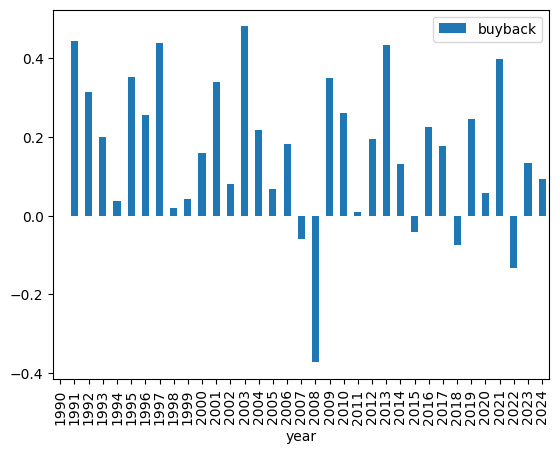

In [10]:
ann['year'] = ann.index.year
ann.plot.bar(y='buyback',x='year')

<Axes: xlabel='year'>

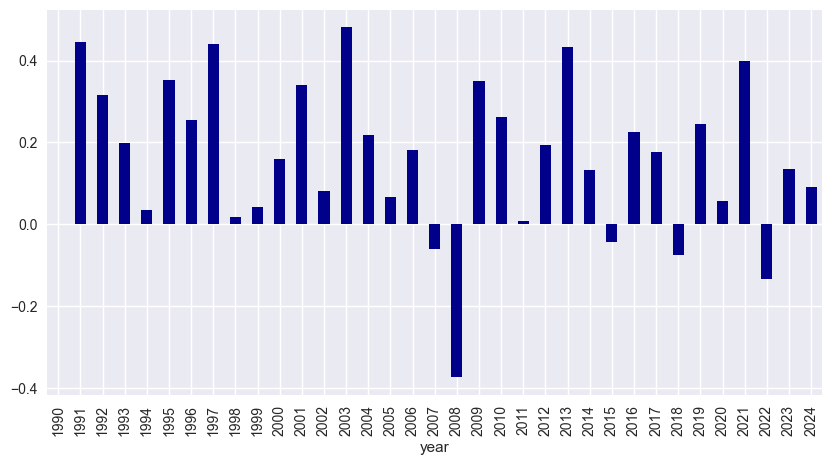

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

ann.plot.bar(y='buyback',x='year',figsize=[10,5],color='darkblue',legend=None)

<Axes: xlabel='year'>

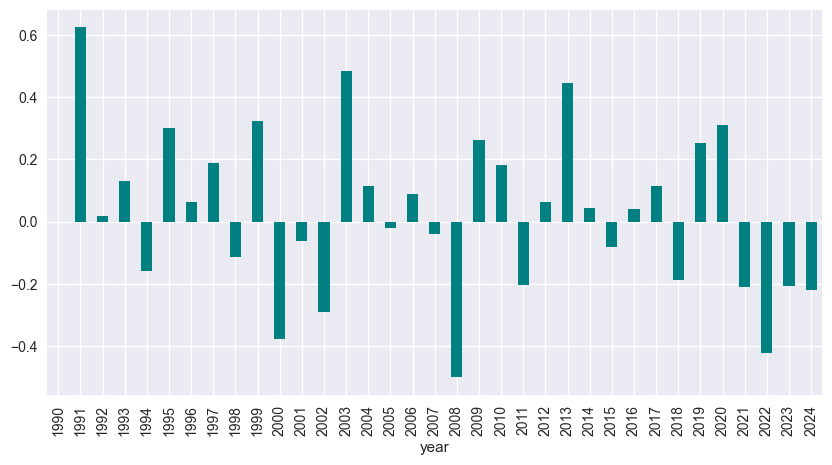

In [12]:
ann.plot.bar(y='seo',x='year',figsize=[10,5],color='teal',legend=None)

<br>

**5. Extra**

**5.1 Extra: Quarterly Returns**

+ Here is how to adjust the procedure to compute quarterly returns.

In [ ]:
mo = compound.index.month
qtr = compound[(mo == 3) | (mo == 6) | (mo == 9) | (mo == 12)]
qtr

In [ ]:
qtr = qtr / qtr.shift(1) - 1
qtr

In [ ]:
qtr.describe().round(4)

**5.2 Fewer xticks/xlabels**

Steps:

1. Save plot as plot/axes object.

2. use `set_xticks` method. This part is slightly odd because `pandas` (really matplotlib) maps the x-axis to start with 0. Have to adjust both the xticks and xlabels with range functions.

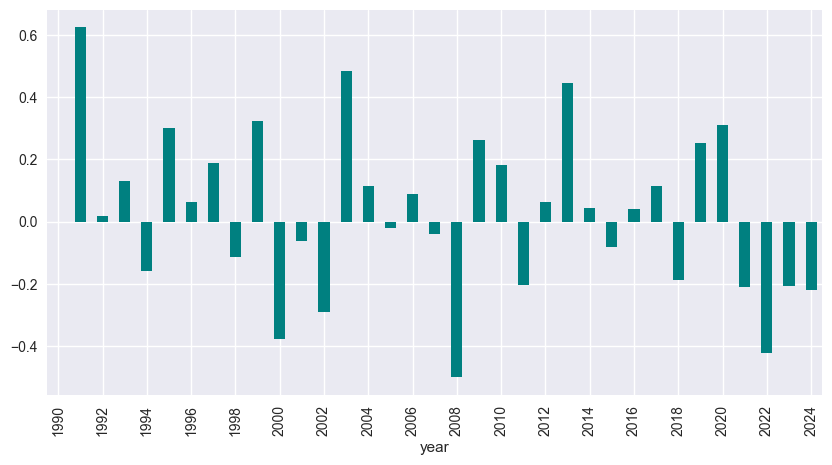

In [13]:
ax = ann.plot.bar(y='seo',x='year',figsize=[10,5],color='teal',legend=None)
ax.set_xticks(ticks=range(0,35,2),labels=range(1990,2025,2))